In [7]:
if __name__ == '__main__':
    from typing import Union
    import os
    from pathlib import Path
    import os
    import sys
    from fastai2.vision.all import *
    from shutil import copyfile
    sys.path.append(str(Path(os.path.abspath('')).parent / "ceruleanserver"))
    from configs import aws_config
    from utils import s3


True

In [8]:
if __name__ == '__main__':
    datapath = Path(os.path.abspath('')) / "data"
    modelpath = "."


In [26]:
if __name__ == '__main__':
    if not datapath.exists():
        os.mkdir(datapath)

    if not any(x for x in datapath.iterdir()):
        bucket = s3.get_s3_bucket(aws_config.S3_BUCKET_NAME)
        s3.download_prefix(
            bucket, datapath, aws_config.S3_TRAINING_DATA_PATH, recursive=True
        )



In [27]:
if __name__ == '__main__':
    oil_chps = np.loadtxt(datapath / "oil_chps.txt", dtype=str)
    codes = np.loadtxt(datapath / "codes.txt", dtype=str)
    valid_names = np.loadtxt(datapath / "valid_names.txt", dtype=str)




In [28]:
oil_chps

array(['S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_0',
       'S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_1',
       'S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_2',
       'S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_3',
       'S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_4',
       'S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_5',
       'S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_6',
       'S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_7',
       'S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_8',
       'S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_9',
       'S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_10',
       'S1A_IW_GRDH_1SDV_20200422T023108_20200422T023133_032234_03BA81_5FD7_11',
       'S1A_IW_GRDH_1SDV_20200422T0231

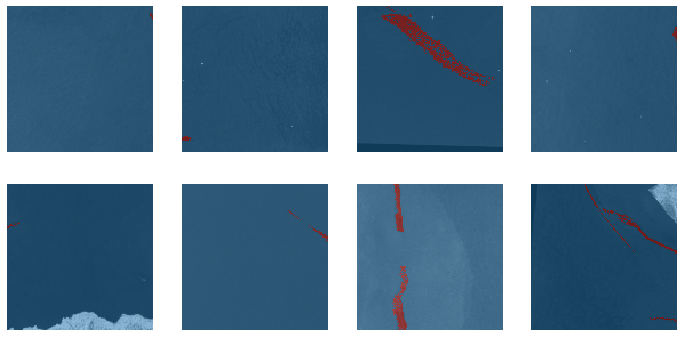

In [22]:

def get_chps(path):
    return [path / "chp" / (chp + ".png") for chp in oil_chps]


def get_lbls(fn):
    return fn.parent.parent / "lbl" / f"{fn.name}"


def splitter_func(fn):
    return (
        fn.name.rsplit("_", 1)[0] in valid_names
    )  # XXX Check to make sure this should be returning True for Valid


if __name__ == '__main__':
    size = 128  # Progressive resizing could happen here

    augs = aug_transforms(flip_vert=True, max_warp=0.1, size=size)

    seg_db = DataBlock(
        blocks=(ImageBlock, MaskBlock(codes=codes)),
        get_items=get_chps,
        splitter=FuncSplitter(splitter_func),
        batch_tfms=augs,
        get_y=get_lbls,
    )

    dls = SegmentationDataLoaders.from_dblock(
        dblock=seg_db, source=datapath, path=datapath, bs=8, num_workers=0
    )

    dls.show_batch(vmin=0, vmax=3)

In [23]:
if __name__ == '__main__':
    random.seed(42)
    oilless_chps = [chp for chp in get_image_files(datapath/'chp') if chp.stem not in oil_chps]
    density = 0
    num_oilless = density * len(oil_chps)
    mixed_chps = random.sample(oilless_chps,num_oilless) + [datapath/'chp'/(chp+'.png') for chp in oil_chps]
    len(mixed_chps)

In [24]:
if __name__ == '__main__':
    arch = 50
    archs = {18: resnet18, 34: resnet34, 50: resnet50}

    learn = unet_learner(dls, archs[arch], metrics=[Dice()]) #model_dir=modelpath

    # learn.load('/content/data/34_256_.683')

    # learn.lr_find()

    #learn.fine_tune(8, 3e-3, cbs=SaveModelCallback(monitor="dice"))

    #learn.load("model")

    #savename = f"{arch}_{size}_{round(learn.validate()[1],3)}.pkl"
    #learn.export(modelpath / savename)

    #learn.show_results(max_n=6, figsize=(20, 20), vmin=0, vmax=3)




In [25]:
if __name__ == '__main__': learn.lr_find()

IndexError: Target 3 is out of bounds.

In [7]:
codes

array(['Background', 'Oil', 'Coincident'], dtype='<U10')